In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import norm, zscore, multivariate_normal
import math
import woti

In [2]:
xs = np.loadtxt('datasets/pdx352.csv', delimiter=',')
yt = np.loadtxt('datasets/chla9.csv', delimiter=',')

# Optimal transport

In [3]:
w_weighted = woti.Woti(method='ot', scale=5e-2)
w_unweighted = woti.Woti(method='ot', weighted=False, scale=5e-2)

WOTi > Successfully initialized.
(Woti) ot based -- max_iter: 1000000 -- no entropy -- weighted, alpha_qp: 1.000000, scale: 0.050000
WOTi > Successfully initialized.
(Woti) ot based -- max_iter: 1000000 -- no entropy -- unweighted


In [6]:
xt_unweighted = w_unweighted.fit_transform(xs, yt) # Equal weights
xt_weighted = w_weighted.fit_transform(xs, yt) # Density correction
distances = np.diag(xs @ xs.T)**(1/32)
distances = (distances - distances.min())/(distances.max() - distances.min())

WOTi > Computing optimal transport plan...
WOTi > Computing optimal transport plan...
WOTi > WOTi fitted.
WOTi > Projecting dataset...
WOTi > Computing source distribution weights...
WOTi > Computing reference distribution weights...
WOTi > Computing optimal transport plan...
WOTi > Computing optimal transport plan...
WOTi > WOTi fitted.
WOTi > Projecting dataset...


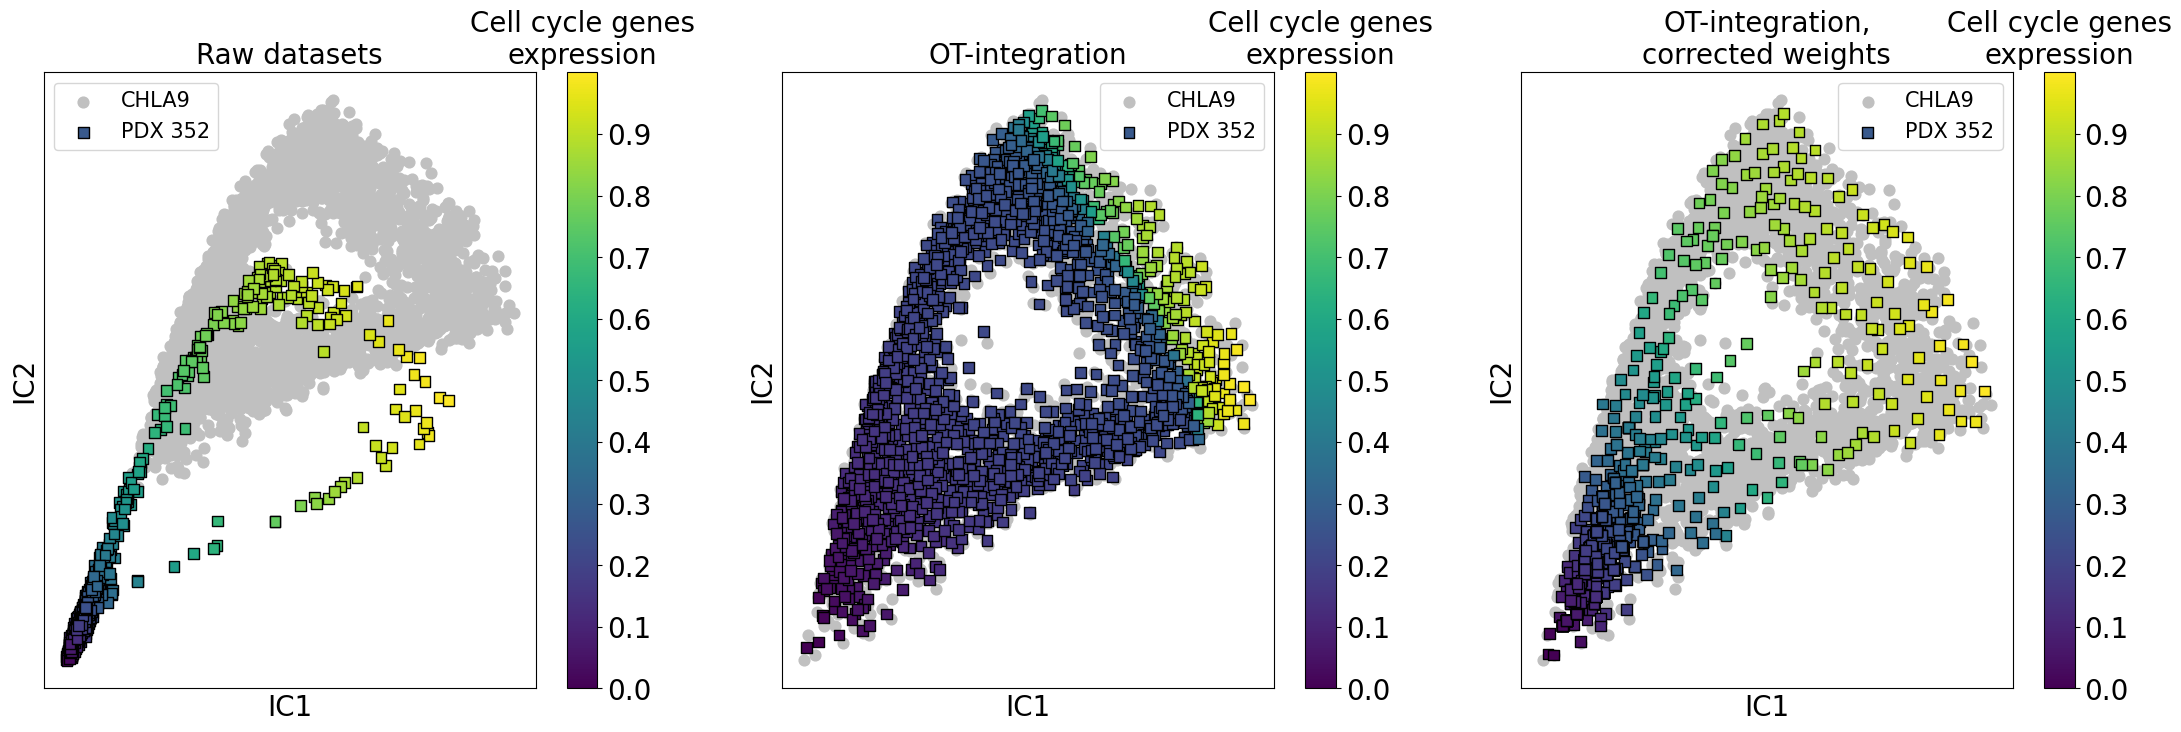

In [7]:
# Optimal transport

plt.style.use('default')

plt.figure(figsize=(27,8))

plt.subplot(1,3,1)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xs.T, s=60, c=distances, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('Raw datasets', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,2)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xt_unweighted.T, s=60, c=distances, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-integration', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

plt.subplot(1,3,3)
plt.scatter(*yt.T, s=60, c='silver', label='CHLA9')
plt.scatter(*xt_weighted.T, s=60, c=distances, cmap='viridis', ec='k', label='PDX 352', marker='s')
plt.xlabel("IC1", fontsize=20)
plt.ylabel("IC2", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=15)
plt.title('OT-integration,\ncorrected weights', fontsize=20)
cbar = plt.colorbar()
cbar.set_ticks( (np.arange(10))/10 )
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title('Cell cycle genes\nexpression', fontsize=20)

pass